
# Employee Performance and Retention Analysis

This notebook performs data analysis, modeling, and insights based on the provided employee dataset.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers


In [2]:
import sys
print("Python version:", sys.version)
try:
    import tensorflow as tf
    print("TensorFlow version:", tf.__version__)
except Exception as e:
    print("TensorFlow import error:", str(e))

Python version: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
TensorFlow version: 2.12.0


In [3]:
df = pd.read_excel("C:\\Users\\choud\\OneDrive\\Downloads\\Tutedude resources\\Tutedude Resourses\\employee_data.xlsx")
df.head()


,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


## Data Cleaning

In [4]:

df = df.drop_duplicates().reset_index(drop=True)
df.isna().sum()


EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64

## Exploratory Data Analysis

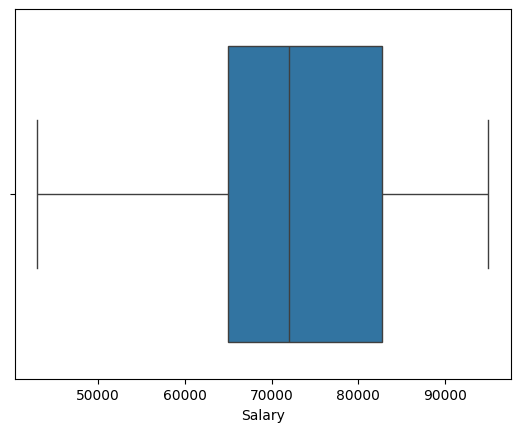

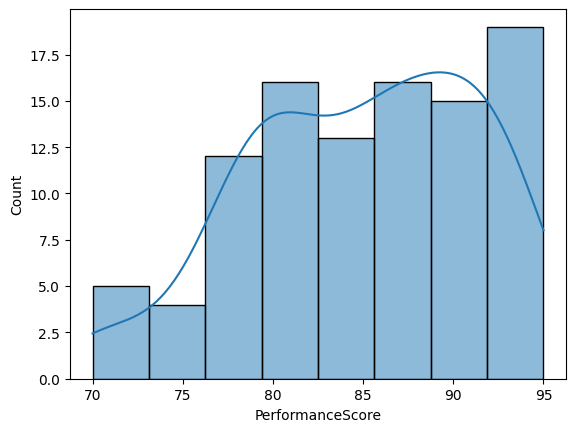

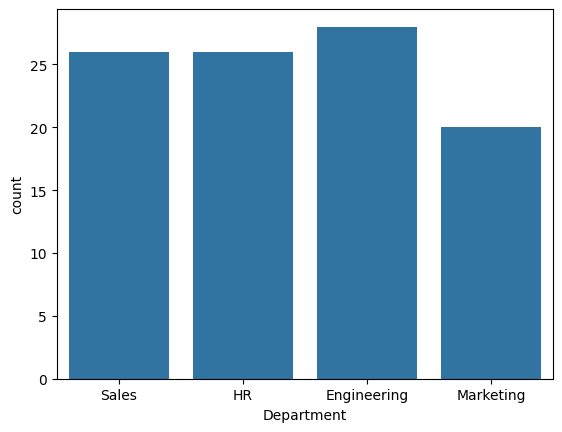

In [5]:

sns.boxplot(x=df['Salary'])
plt.show()

sns.histplot(df['PerformanceScore'], kde=True)
plt.show()

sns.countplot(x=df['Department'])
plt.show()


## Encode Data

In [6]:

le = LabelEncoder()
df['Attrition_bin'] = le.fit_transform(df['Attrition'])
df.head()


,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition,Attrition_bin
0,1,John Doe,29,Sales,55000,3,80,No,0
1,2,Jane Smith,35,HR,60000,7,85,No,0
2,3,Michael Brown,40,Engineering,80000,10,95,Yes,1
3,4,Emily Davis,28,Marketing,65000,5,78,No,0
4,5,David Johnson,50,Sales,75000,20,88,Yes,1


## Attrition Prediction (Classification)

In [7]:

X = df[['Age','YearsAtCompany','Salary','PerformanceScore']]
y = df['Attrition_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.62      0.71      0.67         7

    accuracy                           0.75        20
   macro avg       0.73      0.74      0.73        20
weighted avg       0.76      0.75      0.75        20



## Performance Score Prediction (Regression)

In [8]:

Xr = df[['Age','YearsAtCompany','Salary']]
yr = df['PerformanceScore']

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(Xr_train, yr_train)
pred_r = reg.predict(Xr_test)

print("MSE:", mean_squared_error(yr_test, pred_r))
print("R2 Score:", r2_score(yr_test, pred_r))


MSE: 11.552638859910507
R2 Score: 0.7737438531157362


## Deep Learning Model

In [9]:

model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, verbose=0)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
acc


0.44999998807907104